In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter
sep = os.sep

In [52]:
os.chdir('C:\\Projects\\ature\\')

In [57]:
train_val = pd.read_csv('net_logs'+sep+'unet-driveFAKE.chk.tar.csv', index_col='TYPE')

val = train_val.query('TYPE==1')
T_val = np.arange(val.shape[0])

train = train_val.query('TYPE==0')
T_train =np.arange(train.shape[0])

test= pd.read_csv('net_logs'+sep+'unet-driveFAKE.chk.tarTEST.csv', index_col='TYPE')
T_test = np.arange(test.shape[0])

NameError: name 'prec_hat' is not defined

### Validation Precision-Recall

In [62]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(val['PRECISION'], 3, 1)
rec_hat=savgol_filter(val['RECALL'], 3, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

### Validation F1 Score

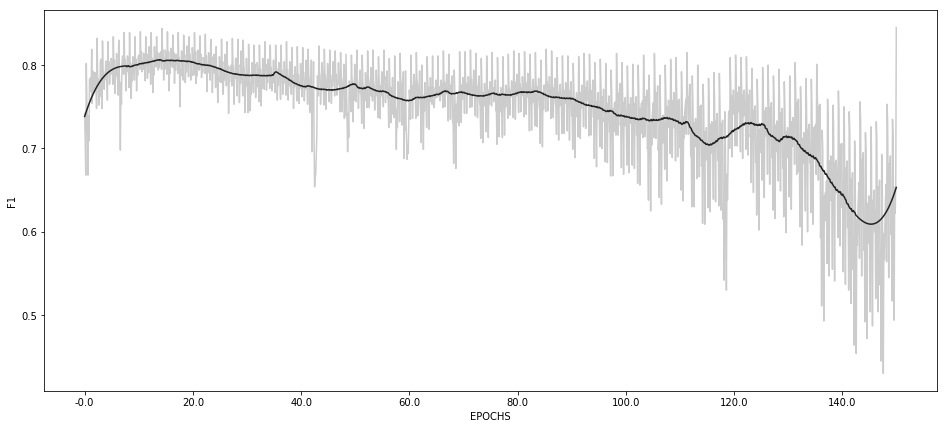

In [66]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['F1'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Validation Accuracy

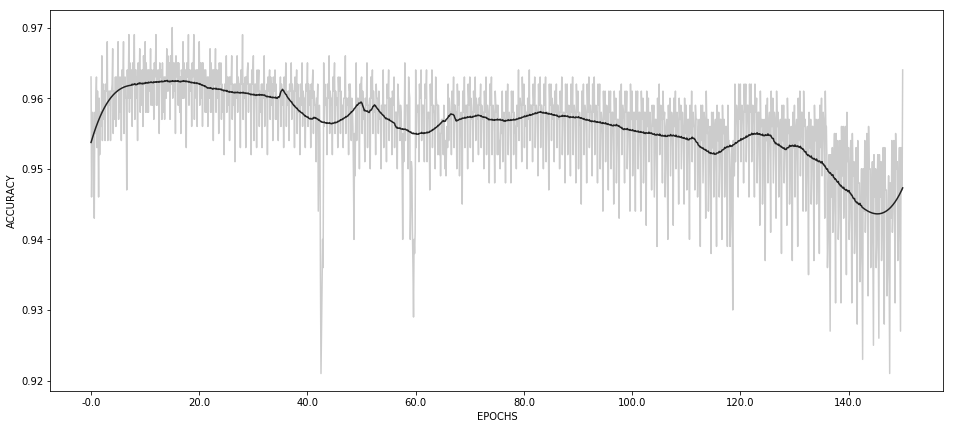

In [67]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(val['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_val,val['ACCURACY'], color='#cccccc')
plt.plot(T_val,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//val.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### Training F1 Score

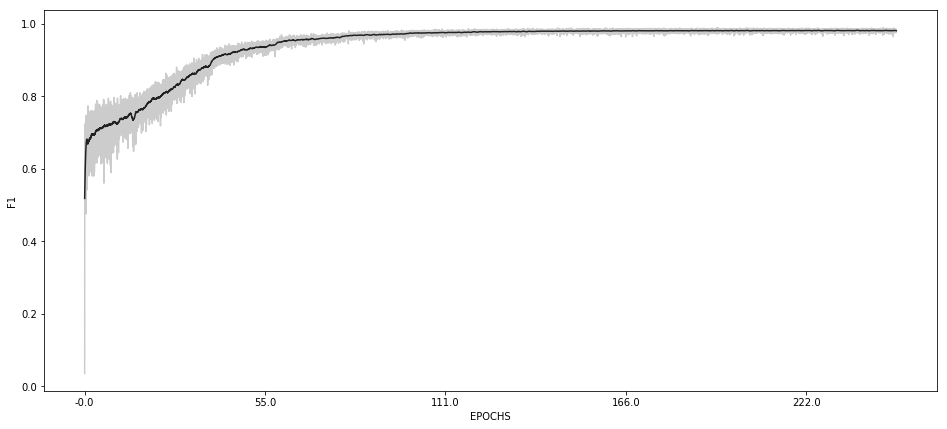

In [63]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['F1'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['F1'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('F1')
plt.show()

### Training precision-recall

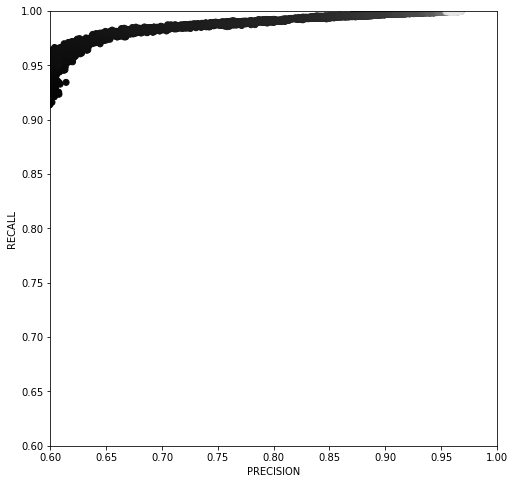

In [64]:
plt.rcParams["figure.figsize"] = [8,8]
prec_hat=savgol_filter(train['PRECISION'], 11, 1)
rec_hat=savgol_filter(train['RECALL'], 11, 1)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
import itertools
z = np.linspace(0,0.9, len(prec_hat))
y = np.column_stack((z,z,z))
colors = itertools.cycle
plt.scatter(prec_hat, rec_hat, color=y)
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Training loss

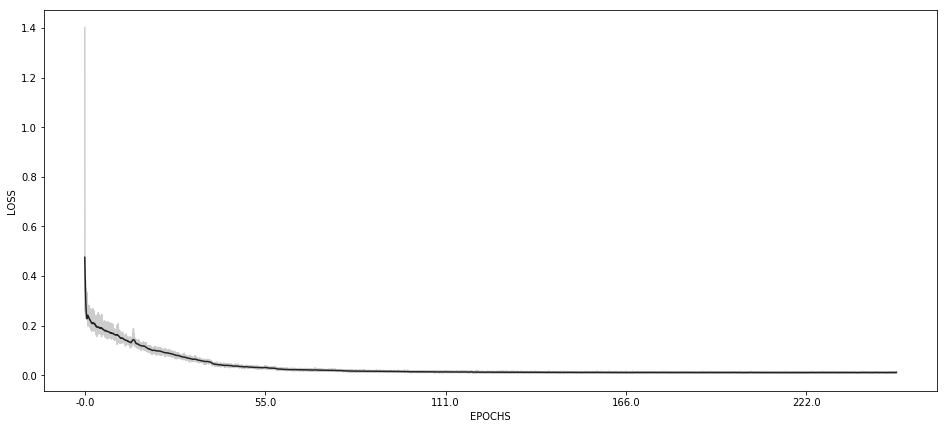

In [65]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['LOSS'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['LOSS'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.show()

### Training Accuracy

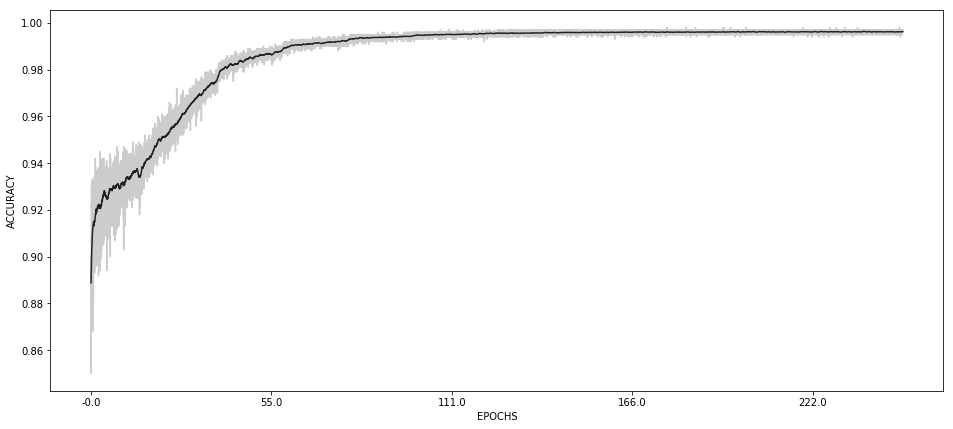

In [66]:
plt.rcParams["figure.figsize"] = [16,7]
f1hat = savgol_filter(train['ACCURACY'], 151, 3)
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(T_train,train['ACCURACY'], color='#cccccc')
plt.plot(T_train,f1hat, color='#222222')
labels = ax.get_xticks()
labels = np.array(labels)//train.query('EPOCH==1').shape[0]
ax.set_xticklabels(labels)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.show()

### TEST F1 Score

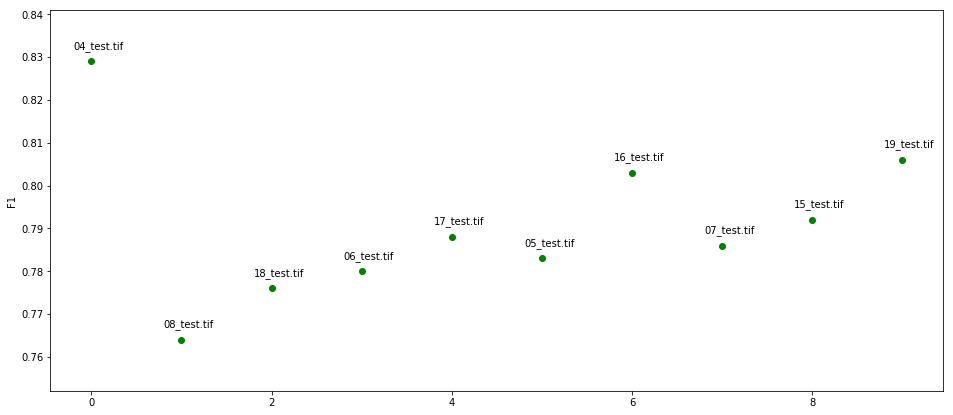

In [67]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('F1')
ax.scatter(T_test, test['F1'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['F1'].iloc[i]), xytext=(T_test[i]-0.2, test['F1'].iloc[i]+0.003))
plt.show()

### TEST precision-recall

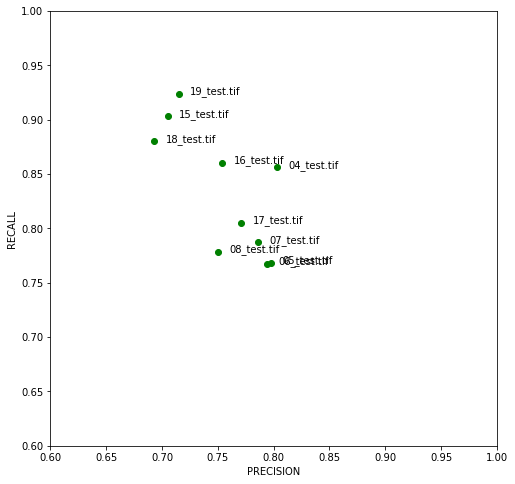

In [68]:
plt.rcParams["figure.figsize"] = [8,8]
fig, ax = plt.subplots()
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.scatter(test['PRECISION'], test['RECALL'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (test['PRECISION'].iloc[i]+0.01, test['RECALL'].iloc[i]))
plt.xlim((0.6, 1))
plt.ylim((0.6, 1))
plt.show()

### Test Accuracy

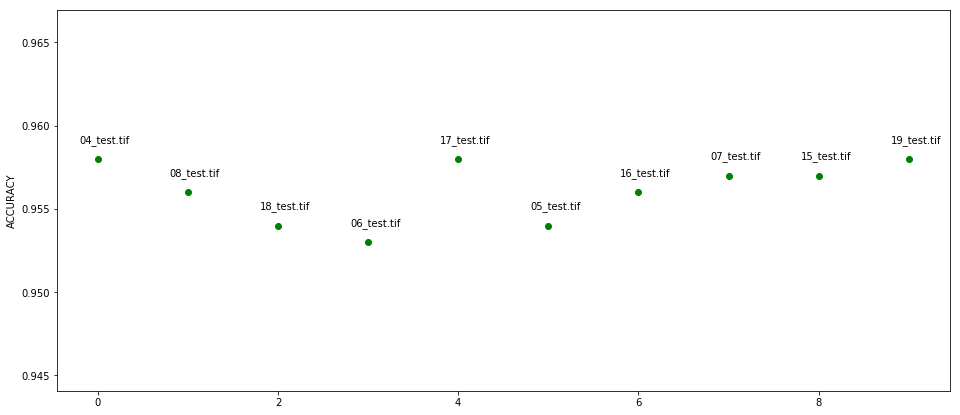

In [69]:
plt.rcParams["figure.figsize"] = [16,7]
fig, ax = plt.subplots()
plt.ylabel('ACCURACY')
ax.scatter(T_test, test['ACCURACY'], color='green')
for i, txt in enumerate(test['ID']):
    ax.annotate(txt, (T_test[i], test['ACCURACY'].iloc[i]), xytext=(T_test[i]-0.2, test['ACCURACY'].iloc[i]+0.001))
plt.show()

### MST

In [5]:
import numpy as np
from commons.segmentation import AtureTest
from PIL import Image as IMG
from commons.IMAGE import SegmentedImage
import cv2
import utils.filter_utils as filutils
import utils.img_utils as imgutils
### DRIVE dataset path setup #####
Dirs = {}

Dirs['data']      = 'data'+sep+'DRIVE'+sep+'testing'

Dirs['images']    = Dirs['data'] +sep+ 'images'
Dirs['mask']      = Dirs['data'] +sep+ 'mask'
Dirs['truth']     = Dirs['data'] +sep+ 'manual1'
Dirs['segmented'] = Dirs['data'] +sep+ 'segmented'

for k, folder in Dirs.items():
    os.makedirs(folder, exist_ok=True)

def get_mask_file(file_name): 
    return file_name.split('_')[0] + '_test_mask.gif'
def get_ground_truth_file(file_name): 
    return file_name.split('_')[0] + '_manual1.gif'

input_image = '19_test.tif'
###### Path end #####
params = {'sk_threshold': 100,
          'alpha': 5.0,
          'orig_contrib': 0.7,
          'seg_threshold': 20}

In [46]:
img_obj = SegmentedImage()

img_obj.load_file(data_dir=Dirs['images'], file_name=input_image)
img_obj.res['orig'] = img_obj.image_arr[:, :, 1]
img_obj.working_arr = imgutils.get_image_as_array(Dirs['segmented'] +sep+ '04_test.tif.png', channels=1)

img_obj.load_mask(mask_dir=Dirs['mask'], fget_mask=get_mask_file, erode=True)
img_obj.load_ground_truth(gt_dir=Dirs['truth'], fget_ground_truth=get_ground_truth_file)
img_obj.apply_mask()
img_obj.generate_skeleton(threshold=params['sk_threshold'])
img_obj.generate_lattice_graph()
img_obj.apply_clahe()

"generate_skeleton(__)" ... took 0.001 seconds
"generate_lattice_graph(__)" ... took 2.564 seconds


In [258]:
tester = AtureTest(out_dir=Dirs['segmented'])
tester.run(params=params, save_images=False, img_obj=img_obj)
img_obj.res['scores']

"run_segmentation(__)" ... took 90.29 seconds
Number of params combination tried: 1


{'Accuracy': 0.9557734270820706,
 'F1': 0.7809746799345612,
 'Precision': 0.6627521907479111,
 'Recall': 0.9505315845237661}

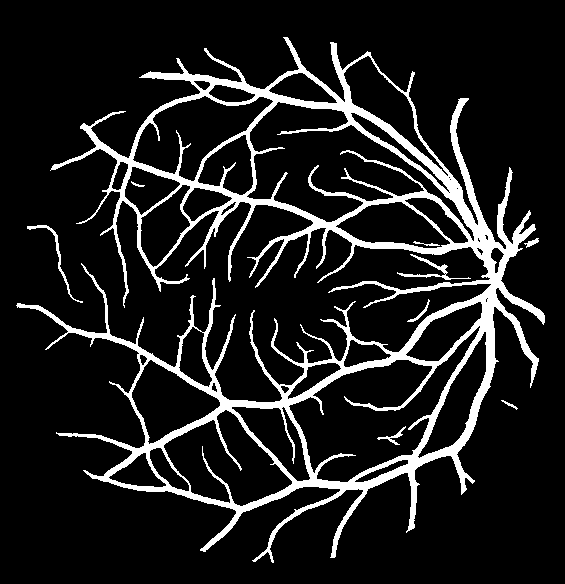

In [259]:
IMG.fromarray(img_obj.res['segmented'])

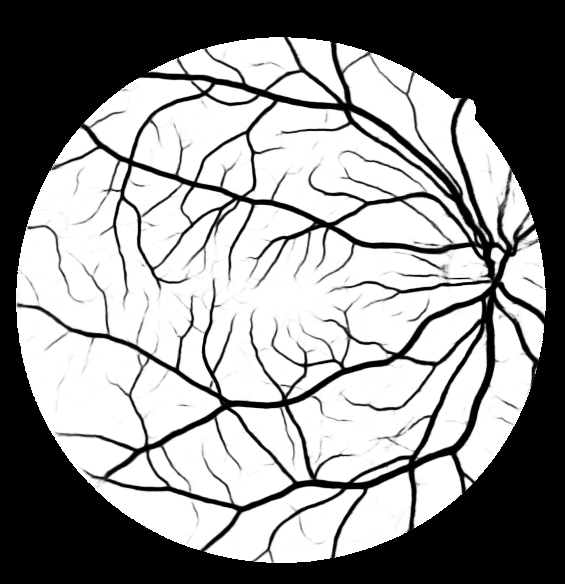

In [227]:
IMG.fromarray(img_obj.working_arr)

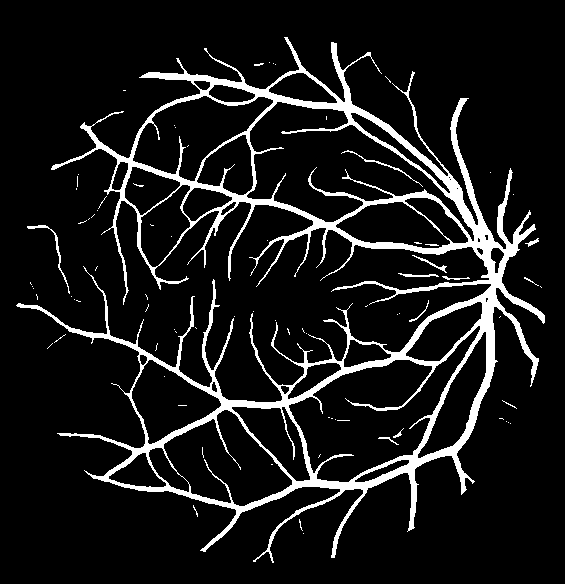

In [246]:
IMG.fromarray(img_obj.res['skeleton'])

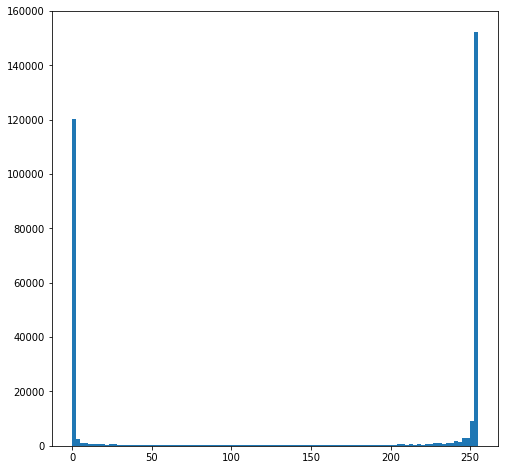

In [248]:
imgutils.histogram(img_obj.working_arr, bins=100)

In [269]:
arr = img_obj.working_arr.copy()

In [270]:
arr[arr>=100] = 255

In [271]:
arr[arr<100] = 0

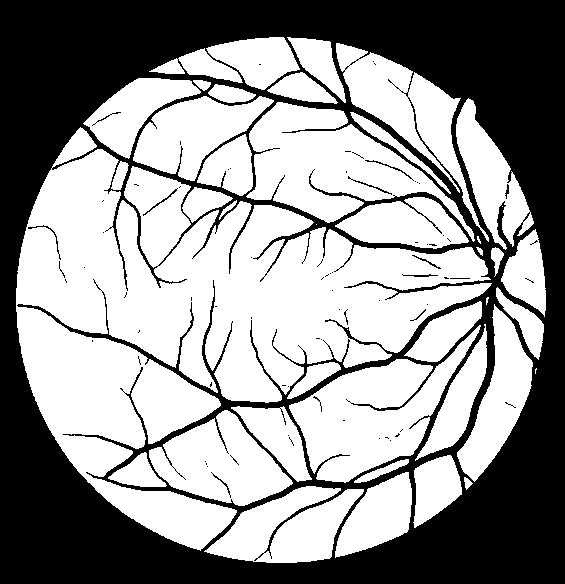

In [272]:
IMG.fromarray(arr)

In [254]:
imgutils.get_praf1(255-arr, img_obj.ground_truth)

{'Accuracy': 0.6148624075645532,
 'F1': 0.2947992275421189,
 'Precision': 0.1737975437241957,
 'Recall': 0.9704431697782324}

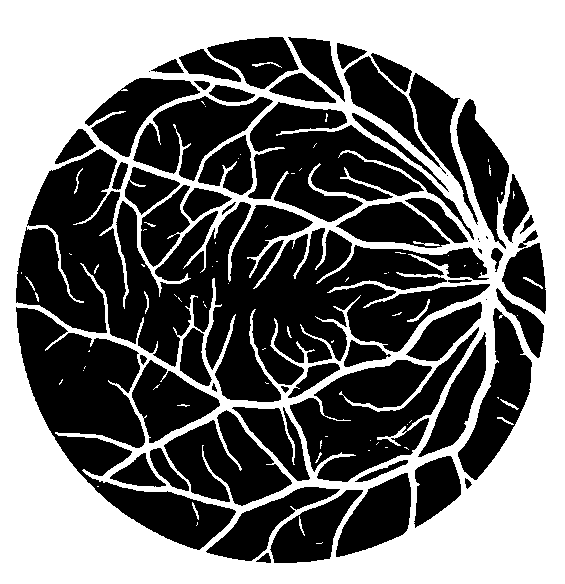

In [255]:
IMG.fromarray(255-arr)

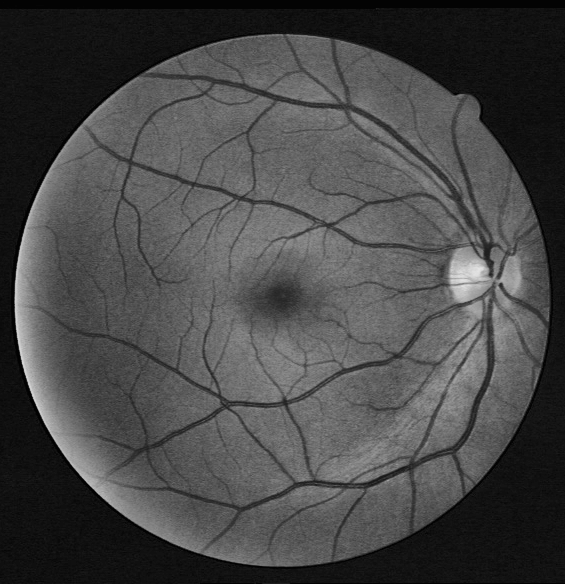

In [10]:
img_obj.working_arr = img_obj.res['orig']
img_obj.apply_clahe()
IMG.fromarray(img_obj.working_arr)

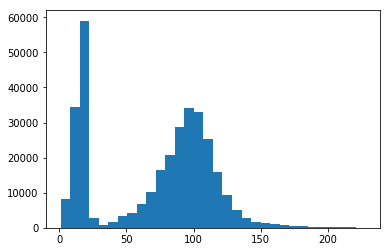

In [11]:
imgutils.histogram(img_obj.working_arr)

In [23]:
X = img_obj.working_arr
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [24]:
z = imgutils.rescale2d_unsigned(W)

In [34]:
z_full = np.array(z*255, dtype=np.uint8)
IMG.fromarray(z_full)

In [26]:
z.shape

(584, 10)

In [38]:
np.unique(z_full, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [44]:
from neuralnet.utils import data_utils

In [47]:
data_utils.get_class_weights(img_obj.ground_truth)

{0: 1.0, 255: 11.0}

In [ ]:
to